In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
import numpy as np

In [8]:
data=pd.read_csv('/home/usmancout/Documents/University Data /7th Semester/ML/Assignments/Machine Learning/Datasets/heart.csv')

In [9]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
X_data=data.drop(['target'], axis=1)
y_data=data['target']

In [12]:
scaler=StandardScaler()
X_data=pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)


In [13]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_data)

In [14]:
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.522556 -1.112803  0.956816  1.149198  0.559252  1.505052  0.071292   
1  2.590381 -0.533162  1.467315 -1.536614 -1.345335 -1.524630  1.469460   
2  3.042352 -1.327521 -0.424765 -1.567204 -0.283814  0.738182  0.378211   
3 -0.492522 -0.276720  0.801442  0.984277  0.487587  1.438634  0.385833   
4  2.187464  1.951477 -0.385539 -0.295793  2.386144  0.563839  1.022689   

        PC8       PC9      PC10      PC11      PC12  
0 -0.049732  0.872570 -0.417433 -0.558838  0.356376  
1 -0.594801 -0.127561 -1.139650 -0.654299  0.855773  
2  1.397097 -0.836844 -0.450680 -0.519250  0.896456  
3  1.566671  0.085219 -0.425601 -0.989851  0.243456  
4 -1.682067  0.451377 -0.534908 -0.721091 -1.069638  


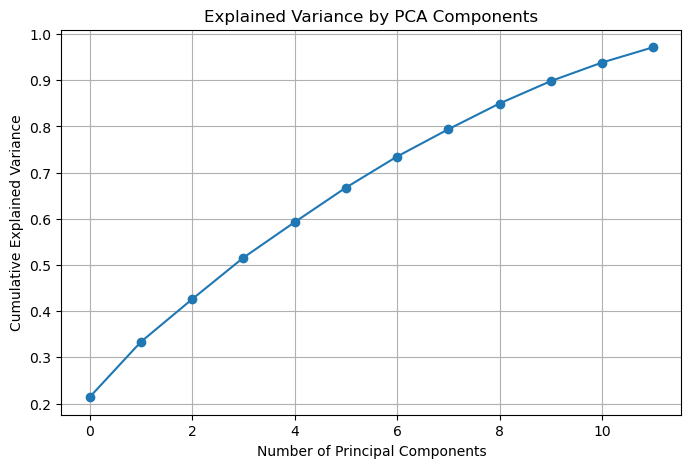

In [15]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_data, test_size=0.3, random_state=42)


In [17]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"PCA + RandomForest accuracy: {accuracy:.4f}")

PCA + RandomForest accuracy: 0.9903


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)


In [19]:
from autofeat import AutoFeatClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PolynomialFeatures


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score


print("\nOriginal Features (X_train):")
print(X_train.columns.tolist())

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("\nFeatures after PolynomialFeatures:")
print(poly.get_feature_names_out(X_train.columns))

model_poly = RandomForestClassifier(random_state=42)
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)
acc_poly = accuracy_score(y_test, y_pred_poly)

print(f"\nAccuracy after PolynomialFeatures + RandomForest: {acc_poly:.4f}")

model_orig = RandomForestClassifier(random_state=42)
model_orig.fit(X_train, y_train)

y_pred_orig = model_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

print(f"\nAccuracy with Original Features + RandomForest: {acc_orig:.4f}")



Original Features (X_train):
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Features after PolynomialFeatures:
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'age^2' 'age sex' 'age cp' 'age trestbps'
 'age chol' 'age fbs' 'age restecg' 'age thalach' 'age exang'
 'age oldpeak' 'age slope' 'age ca' 'age thal' 'sex^2' 'sex cp'
 'sex trestbps' 'sex chol' 'sex fbs' 'sex restecg' 'sex thalach'
 'sex exang' 'sex oldpeak' 'sex slope' 'sex ca' 'sex thal' 'cp^2'
 'cp trestbps' 'cp chol' 'cp fbs' 'cp restecg' 'cp thalach' 'cp exang'
 'cp oldpeak' 'cp slope' 'cp ca' 'cp thal' 'trestbps^2' 'trestbps chol'
 'trestbps fbs' 'trestbps restecg' 'trestbps thalach' 'trestbps exang'
 'trestbps oldpeak' 'trestbps slope' 'trestbps ca' 'trestbps thal'
 'chol^2' 'chol fbs' 'chol restecg' 'chol thalach' 'chol exang'
 'chol oldpeak' 'chol slope' 'chol ca' 'chol thal' 'fbs^2' 'fbs restecg'
 'f